# Exploratory Visualization of Traffic on a section of the I-94

We will visualize the various indicators of heavy traffic westbound on the I-94 between Minneapolis and Saint Paul and try to visualize leading causes

In [21]:
import pandas as pd
import numpy as np

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(traffic.head())
print(traffic.tail())
print(traffic.info())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

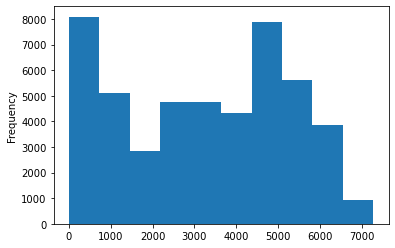

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()

traffic['traffic_volume'].describe()

In [23]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [24]:
mask = (traffic['date_time'].dt.hour >=7) & (traffic['date_time'].dt.hour < 19)

In [25]:
day = traffic[mask]

In [26]:
day.shape

(23877, 9)

In [27]:
night = traffic[~mask]

In [28]:
night.shape

(24327, 9)

(0.0, 8000.0)

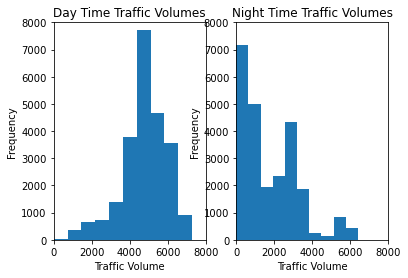

In [29]:
plt.figure()

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Day Time Traffic Volumes')
plt.xlim(0, 8000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Night Time Traffic Volumes')
plt.xlim(0, 8000)
plt.ylim(0,8000)


In [30]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [31]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## Observations:

Night time traffic is generally much lower than day time traffic.

In [32]:
%matplotlib inline
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

/var/folders/91/lmb79xzd7v7b3dp6_n9djnfh0000gn/T/ipykernel_4953/2777740353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


<AxesSubplot:xlabel='month'>

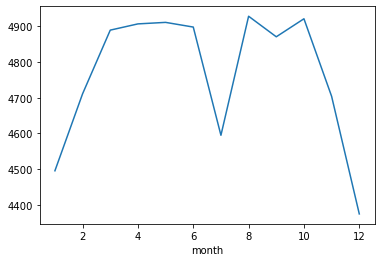

In [33]:
by_month['traffic_volume'].plot.line()

/var/folders/91/lmb79xzd7v7b3dp6_n9djnfh0000gn/T/ipykernel_4953/3108436627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dayofweek'] = day['date_time'].dt.dayofweek


<AxesSubplot:xlabel='dayofweek'>

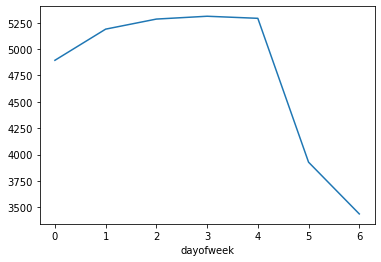

In [34]:
plt.subplot()
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()

/var/folders/91/lmb79xzd7v7b3dp6_n9djnfh0000gn/T/ipykernel_4953/2743671098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


Text(0.5, 1.0, 'Weekends')

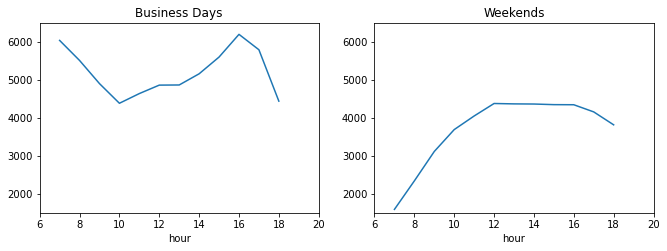

In [35]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] < 5]
weekends = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.xlim(6,20)
plt.title('Business Days')

plt.subplot(1,2,2)
by_hour_weekends['traffic_volume'].plot.line()
plt.ylim(1500,6500)
plt.xlim(6,20)
plt.title('Weekends')

In [36]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

(230.0, 320.0)

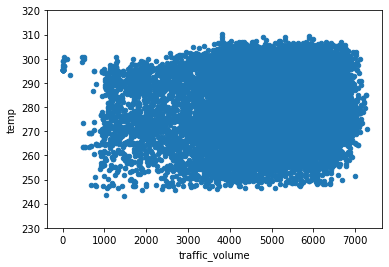

In [37]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)

In [38]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

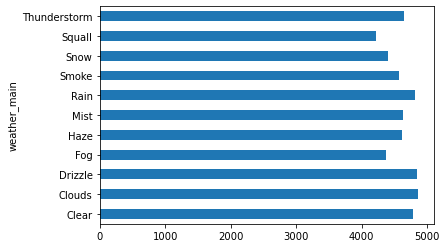

In [39]:
by_weather_main['traffic_volume'].plot.barh()

In [40]:
by_weather_description['traffic_volume'].plot.barh(gi)

NameError: name 'gi' is not defined